In [9]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

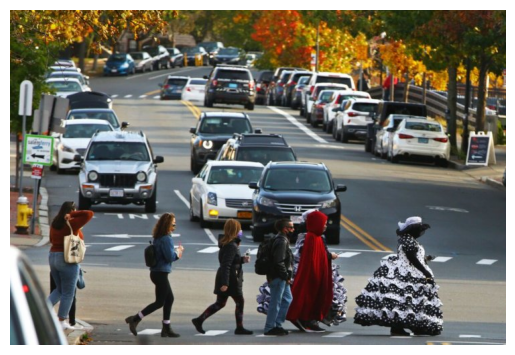

In [11]:
my_new_image = cv2.imread(r"C:\Users\matei\Downloads\cars.png")
plt.imshow(cv2.cvtColor(my_new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


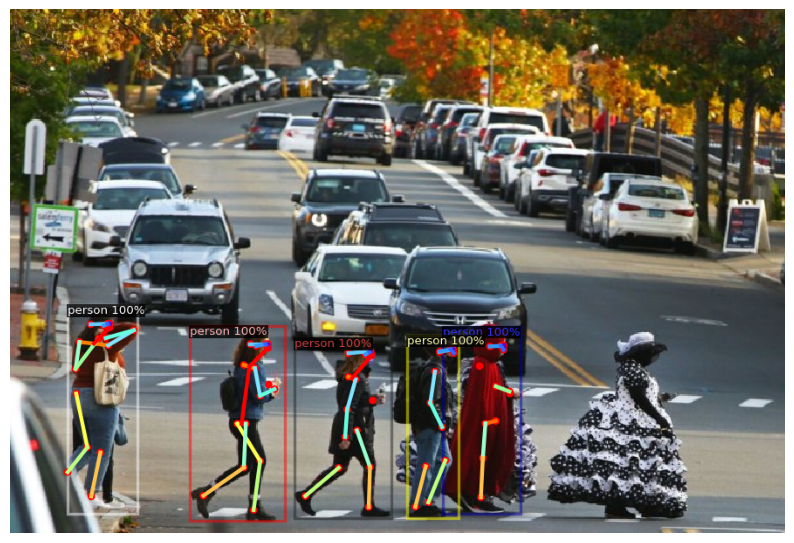

In [16]:

# Load the image
image_path = r"C:\Users\matei\Downloads\cars.png"
my_new_image = cv2.imread(image_path)

# Inference with a keypoint detection model
cfg_keypoint = get_cfg()   # get a fresh new config
cfg_keypoint.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg_keypoint.MODEL.DEVICE = "cpu"  # Force computation on CPU
cfg_keypoint.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg_keypoint.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg_keypoint)
outputs = predictor(my_new_image)

# Convert OpenCV image to RGB for visualization
my_new_image_rgb = cv2.cvtColor(my_new_image, cv2.COLOR_BGR2RGB)

# Visualize the predictions
v = Visualizer(my_new_image_rgb, MetadataCatalog.get(cfg_keypoint.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert the visualization output to RGB format for Matplotlib compatibility
out_image_rgb = out.get_image()

# Display the image using Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(out_image_rgb)
plt.axis("off")
plt.show()


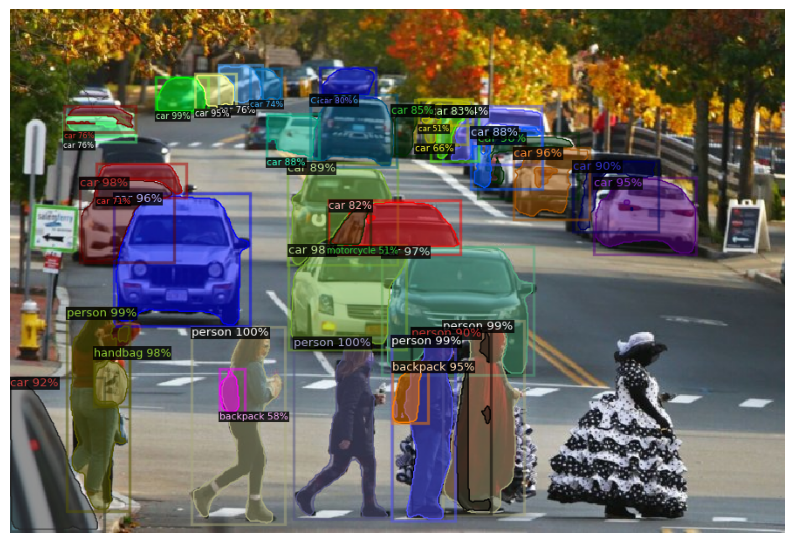

In [20]:
# Load the image
image_path = r"C:\Users\matei\Downloads\cars.png"
my_new_image = cv2.imread(image_path)

# Inference with instance segmentation model
cfg_inst = get_cfg()
cfg_inst.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_inst.MODEL.DEVICE = "cpu"  # Force computation on CPU
cfg_inst.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg_inst.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg_inst)
outputs = predictor(my_new_image)

# Convert OpenCV image to RGB for visualization
my_new_image_rgb = cv2.cvtColor(my_new_image, cv2.COLOR_BGR2RGB)

# Visualize the predictions
v = Visualizer(my_new_image_rgb, MetadataCatalog.get(cfg_inst.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert the visualization output to RGB format for Matplotlib compatibility
out_image_rgb = out.get_image()

# Display the image using Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(out_image_rgb)
plt.axis("off")
plt.show()


model_final_c10459.pkl: 184MB [00:27, 6.59MB/s]                                                                        


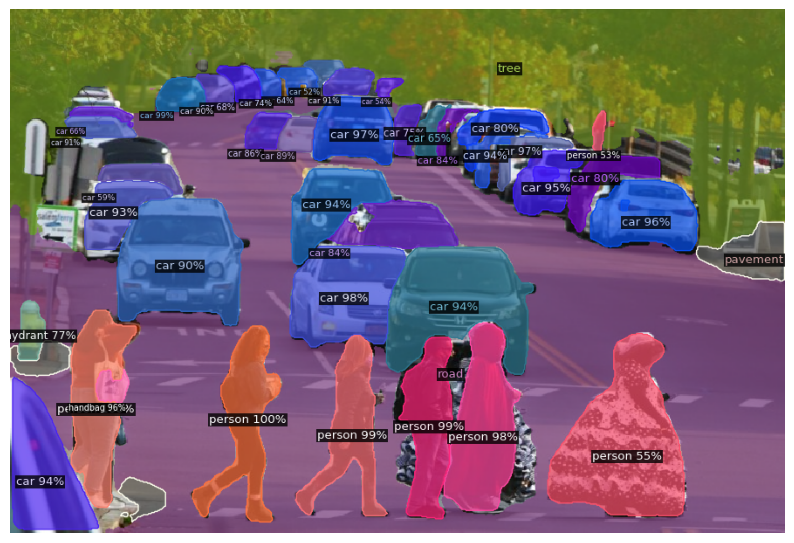

In [21]:
# Load the image
image_path = r"C:\Users\matei\Downloads\cars.png"
my_new_image = cv2.imread(image_path)

# Inference with panoptic segmentation model
cfg_panoptic = get_cfg()
cfg_panoptic.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"))
cfg_panoptic.MODEL.DEVICE = "cpu"  # Force computation on CPU
cfg_panoptic.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg_panoptic.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
predictor = DefaultPredictor(cfg_panoptic)
panoptic_seg, segments_info = predictor(my_new_image)["panoptic_seg"]

# Convert OpenCV image to RGB for visualization
my_new_image_rgb = cv2.cvtColor(my_new_image, cv2.COLOR_BGR2RGB)

# Visualize the predictions
v = Visualizer(my_new_image_rgb, MetadataCatalog.get(cfg_panoptic.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

# Convert the visualization output to RGB format for Matplotlib compatibility
out_image_rgb = out.get_image()

# Display the image using Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(out_image_rgb)
plt.axis("off")
plt.show()
